# Histograms from 3D-EBSD

### Import packages

In [298]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import h5py
import pandas as pd

# 3D grains

### Data loading from dream3d file:

In [299]:
def read_dream3d_file(file_path, dataset_name):
    with h5py.File(file_path, 'r') as file:
        # Access different groups and datasets within the HDF5 file
        group = file['DataContainers/ImageDataContainer/CellFeatureData']
        dataset = group[dataset_name]

        # Extract data as needed
        data = dataset[...]

        return data

In [300]:
## Add here the path and name of your dream3d file
file_BA = '3D/BA_3D/BA_microstructure_cleanfilled_grainshape-top100.dream3d'
file_NoBA = '3D/NoBA_3D/NoBA_microstructure_cleanfilled_grainshape-top100.dream3d'
#file_NoBA = '3D/NoBA_3D/NoBA_microstructure_cleanfilled_grainshape.dream3d'

## Add here the name of the arrays you want to plot
eqdiameterBA = read_dream3d_file(file_BA, 'EquivalentDiameters')
eqdiameterNoBA = read_dream3d_file(file_NoBA, 'EquivalentDiameters')

largestareaBA = read_dream3d_file(file_BA, 'LargestCrossSectionsXY')
largestareaNoBA = read_dream3d_file(file_NoBA, 'LargestCrossSectionsXY')

sphericityBA = read_dream3d_file(file_BA, 'Sphericity')
sphericityNoBA = read_dream3d_file(file_NoBA, 'Sphericity')

aspectratioBA = read_dream3d_file(file_BA, 'AspectRatios')
aspectratioNoBA = read_dream3d_file(file_NoBA, 'AspectRatios')

## Add here the name of the images of histograms to be exported
output_filename_3DEBSD = 'eqdiameters_histogram_3DEBSD.png'
output_filename_area = 'largestarea_histogram_3DEBSD.png'
output_filename_sphericity = 'sphericity_histogram_3DEBSD.png'
output_filename_aspectratio = 'aspectratio_histogram_3DEBSD.png'


In [301]:
np.min(aspectratioNoBA)

0.0

## Plot the histograms

### Equivalent diameter

If necessary, apply a threshold

In [302]:
threshold = 5
dataBA = eqdiameterBA[eqdiameterBA >= threshold]
dataNoBA = eqdiameterNoBA[eqdiameterNoBA >= threshold]

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


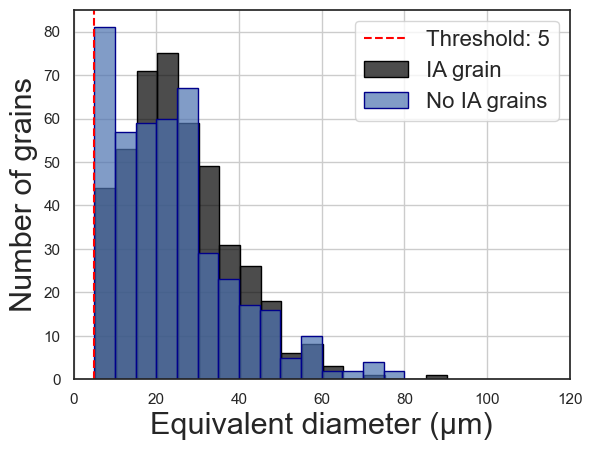

In [303]:
sns.set(style="white")

plt.rcParams.update({'font.size': 16})  # Adjust the font size as needed

sns.histplot(dataBA, color='black', binwidth=5,alpha=0.7,edgecolor='black', kde=False, label='IA grain') # alpha=0.5, 
sns.histplot(dataNoBA, binwidth=5,alpha=0.7,edgecolor='darkblue',  kde=False, label='No IA grains') # alpha=0.5, 
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold: {threshold}')

# Set x-axis and y-axis range
plt.xlim(0, 120)
#plt.ylim(0,2000)

    # Set labels and title with larger font size
plt.xlabel('Equivalent diameter (µm)', fontsize=22)
plt.ylabel('Number of grains', fontsize=22)
#plt.title('Grain size comparison', fontsize=22)

    # Add a legend with larger font size
plt.legend(fontsize=16)

    # Save the plot as a PNG file in the same folder where the Jupyter notebook is
plt.savefig(output_filename_3DEBSD, dpi=300, bbox_inches='tight')

    # Show the plot
plt.grid(True)
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


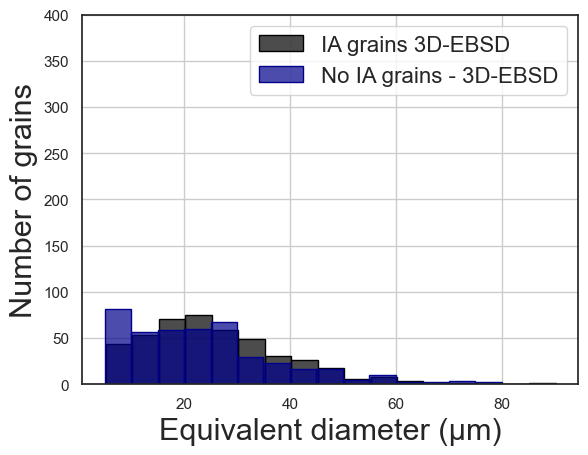

In [304]:
# sphericity histograms Without threshold

sns.set(style="white")
sns.set_palette(["black", "darkblue"])  # Ensure colors remain correct

plt.rcParams.update({'font.size': 16})

sns.histplot(dataBA, color='black', binwidth=5, alpha=0.7, edgecolor='black', kde=False, label='IA grains 3D-EBSD', multiple="layer")
sns.histplot(dataNoBA, color='darkblue', binwidth=5, alpha=0.7, edgecolor='darkblue', kde=False, label='No IA grains - 3D-EBSD', multiple="layer")

plt.ylim(0, 400)
plt.xlabel('Equivalent diameter (µm)', fontsize=22)
plt.ylabel('Number of grains', fontsize=22)

plt.legend(fontsize=16)
plt.savefig(output_filename_3DEBSD, dpi=300, bbox_inches='tight')

plt.grid(True)
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


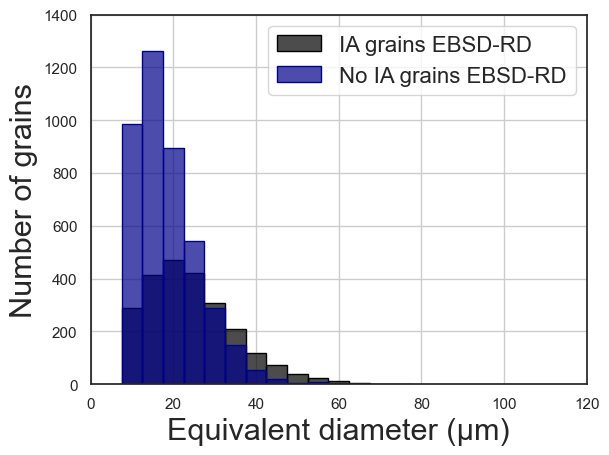

In [305]:
BA_ebsdRD="BA_NDRD/BA_RD_smallGrainsData.csv"
NoBA_ebsdRD="NoBA_NDRD/NoBA_RD_smallGrainsData.csv"
BARD = pd.read_csv(BA_ebsdRD)
NoBARD = pd.read_csv(NoBA_ebsdRD)
eqdiameters_BARD = BARD['EquivalentDiameter']
eqdiameters_NoBARD = NoBARD['EquivalentDiameter']

# sphericity histograms Without threshold

sns.set(style="white")
sns.set_palette(["black", "darkblue"])  # Ensure colors remain correct

plt.rcParams.update({'font.size': 16})

sns.histplot(eqdiameters_BARD, color='black', binwidth=5, alpha=0.7, edgecolor='black', kde=False, label='IA grains EBSD-RD', multiple="layer")
sns.histplot(eqdiameters_NoBARD, color='darkblue', binwidth=5, alpha=0.7, edgecolor='darkblue', kde=False, label='No IA grains EBSD-RD', multiple="layer")

plt.xlim(0, 120)
plt.ylim(0, 1400)

plt.xlabel('Equivalent diameter (µm)', fontsize=22)
plt.ylabel('Number of grains', fontsize=22)


plt.legend(fontsize=16)
plt.savefig("eqdiameters_histogram_2D-RD.png", dpi=300, bbox_inches='tight')

plt.grid(True)
plt.show()


### Aspect ratio

C:\Users\GlassDesktop\AppData\Local\Temp\ipykernel_25808\16118637.py:10: RuntimeWarning: divide by zero encountered in divide
  dataBA_inverted = 1/dataBA[:,1]
C:\Users\GlassDesktop\AppData\Local\Temp\ipykernel_25808\16118637.py:11: RuntimeWarning: divide by zero encountered in divide
  dataNoBA_inverted = 1/dataNoBA[:,1]
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


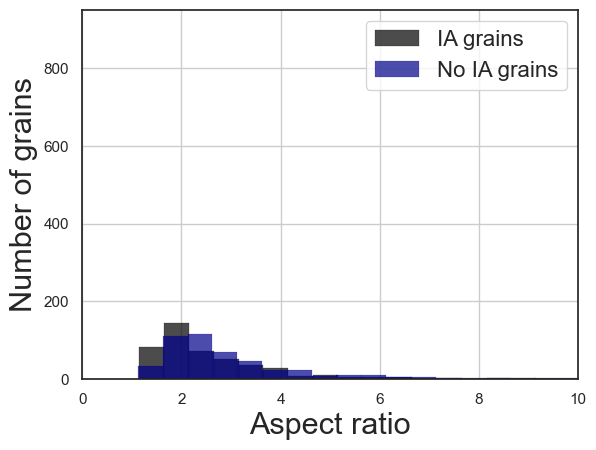

In [306]:

dataBA = aspectratioBA
dataNoBA = aspectratioNoBA
# sphericity histograms Without threshold

sns.set(style="white")
sns.set_palette(["black", "darkblue"])  # Ensure colors remain correct

plt.rcParams.update({'font.size': 16})

dataBA_inverted = 1/dataBA[:,1]
dataNoBA_inverted = 1/dataNoBA[:,1]

sns.histplot(dataBA_inverted, color='black', binwidth=0.5, alpha=0.7, edgecolor='black', kde=False, label='IA grains', multiple="layer")
sns.histplot(dataNoBA_inverted, color='darkblue', binwidth=0.5, alpha=0.7, edgecolor='darkblue', kde=False, label='No IA grains', multiple="layer")


plt.xlabel('Aspect ratio', fontsize=22)
plt.ylabel('Number of grains', fontsize=22)

plt.xlim(0, 10)
plt.ylim(0, 950)

plt.legend(fontsize=16)
plt.savefig('aspect_ratio_asmtex.png', dpi=300, bbox_inches='tight')

plt.grid(True)
plt.show()

### Sphericity

In [307]:
threshold = 1
dataBA = sphericityBA[sphericityBA <= threshold]
dataNoBA = sphericityNoBA[sphericityNoBA <= threshold]

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


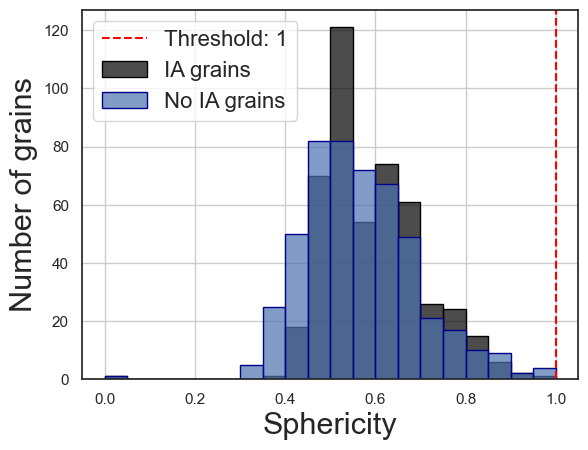

In [308]:
sns.set(style="white")

plt.rcParams.update({'font.size': 16})  # Adjust the font size as needed


sns.histplot(dataBA, color='black', binwidth=0.05,alpha=0.7,edgecolor='black', kde=False, label='IA grains') # alpha=0.5, 
sns.histplot(dataNoBA, binwidth=0.05,alpha=0.7,edgecolor='darkblue',  kde=False, label='No IA grains') # alpha=0.5, 
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold: {threshold}')

# Set x-axis and y-axis range
#plt.xlim(0, 1)
#plt.ylim(0,100)

    # Set labels and title with larger font size
plt.xlabel('Sphericity', fontsize=22)
plt.ylabel('Number of grains', fontsize=22)
#plt.title('Grain size comparison', fontsize=22)

    # Add a legend with larger font size
plt.legend(fontsize=16)

    # Save the plot as a PNG file in the same folder where the Jupyter notebook is
plt.savefig(output_filename_sphericity, dpi=300, bbox_inches='tight')

    # Show the plot
plt.grid(True)
plt.show()



c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


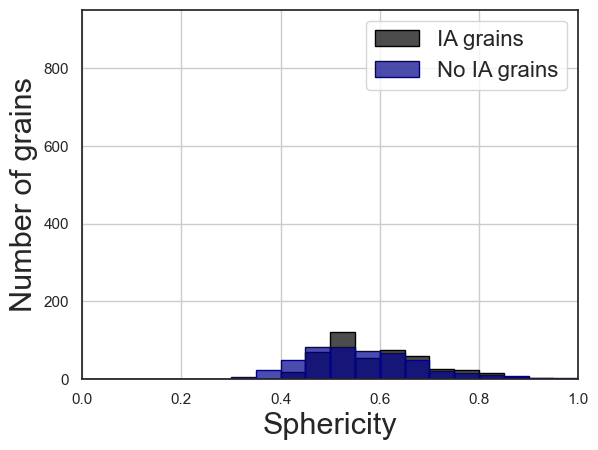

In [309]:
# sphericity histograms Without threshold

sns.set(style="white")
sns.set_palette(["black", "darkblue"])  # Ensure colors remain correct

plt.rcParams.update({'font.size': 16})

sns.histplot(dataBA, color='black', binwidth=0.05, alpha=0.7, edgecolor='black', kde=False, label='IA grains', multiple="layer")
sns.histplot(dataNoBA, color='darkblue', binwidth=0.05, alpha=0.7, edgecolor='darkblue', kde=False, label='No IA grains', multiple="layer")

plt.xlim(0, 1)
plt.ylim(0, 950)
plt.xlabel('Sphericity', fontsize=22)
plt.ylabel('Number of grains', fontsize=22)

plt.legend(fontsize=16)
plt.savefig(output_filename_sphericity, dpi=300, bbox_inches='tight')

plt.grid(True)
plt.show()


### Largest area along XY slices

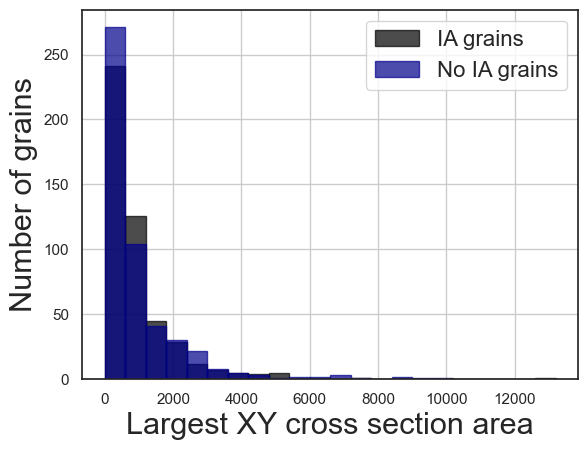

In [310]:
sns.set(style="white")

plt.rcParams.update({'font.size': 16})

# Force Matplotlib color assignment explicitly
plt.hist(largestareaBA, bins=range(int(min(largestareaBA)), int(max(largestareaBA)) + 600, 600), 
         color='black', alpha=0.7, edgecolor='black', label='IA grains')

plt.hist(largestareaNoBA, bins=range(int(min(largestareaNoBA)), int(max(largestareaNoBA)) + 600, 600), 
         color='darkblue', alpha=0.7, edgecolor='darkblue', label='No IA grains')

# Set labels and title with larger font size
plt.xlabel('Largest XY cross section area', fontsize=22)
plt.ylabel('Number of grains', fontsize=22)

# Add a legend with larger font size
plt.legend(fontsize=16)

# Save the plot
plt.savefig(output_filename_area, dpi=300, bbox_inches='tight')

# Show the plot
plt.grid(True)
plt.show()


## Print grains data

In [311]:
print(f" Num grains:   {len(dataBA)} grains".ljust(20))
print("---------------------------")
print(f" Mean diameter:  {np.mean(dataBA):.2f} µm".ljust(20))
print("---------------------------")
print(f" Max diameter:   {np.max(dataBA):.2f} µm".ljust(20))
print("---------------------------")
print(f" Min diameter:     {np.min(dataBA):.2f} µm".ljust(20))
print("---------------------------")
print(f" Standard dev:   {np.std(dataBA):.2f} µm".ljust(20))

 Num grains:   474 grains
---------------------------
 Mean diameter:  0.59 µm
---------------------------
 Max diameter:   0.99 µm
---------------------------
 Min diameter:     0.00 µm
---------------------------
 Standard dev:   0.11 µm


In [312]:
print(f" Num grains BA:   {len(dataBA)} grains".ljust(20), f"\n Num grains NoBA: {len(dataNoBA)} grains".ljust(21))
print("-----------------------------")
print(f" Mean diameter BA:   {np.mean(dataBA):.2f} µm".ljust(20), f"\n Mean diameter NoBA: {np.mean(dataNoBA):.2f} µm".ljust(21))
print("-----------------------------")
print(f" Max diameter BA:    {np.max(dataBA):.2f} µm".ljust(20), f"\n Max diameter NoBA: {np.max(dataNoBA):.2f} µm".ljust(21))
print("-----------------------------")
print(f" Min diameter BA:     {np.min(dataBA):.2f} µm".ljust(20), f"\n Min diameter NoBA:   {np.min(dataNoBA):.2f} µm".ljust(21))
print("----------------------------------")
print(f" Standard deviation BA:   {np.std(dataBA):.2f} µm".ljust(20), f"\n Standard deviation NoBA: {np.std(dataNoBA):.2f} µm".ljust(21))

 Num grains BA:   474 grains 
 Num grains NoBA: 496 grains
-----------------------------
 Mean diameter BA:   0.59 µm 
 Mean diameter NoBA: 0.57 µm
-----------------------------
 Max diameter BA:    0.99 µm 
 Max diameter NoBA: 1.00 µm
-----------------------------
 Min diameter BA:     0.00 µm 
 Min diameter NoBA:   0.00 µm
----------------------------------
 Standard deviation BA:   0.11 µm 
 Standard deviation NoBA: 0.13 µm


In [313]:
np.shape(np.squeeze(eqdiameterBA))

(476,)

C:\Users\GlassDesktop\AppData\Local\Temp\ipykernel_25808\3643106609.py:12: RuntimeWarning: divide by zero encountered in divide
  dataBA_inverted = 1/dataBA
C:\Users\GlassDesktop\AppData\Local\Temp\ipykernel_25808\3643106609.py:13: RuntimeWarning: divide by zero encountered in divide
  dataNoBA_inverted = 1/dataNoBA
C:\Users\GlassDesktop\AppData\Local\Temp\ipykernel_25808\3643106609.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_BARD = df_BARD.groupby('Diameter Bin').mean()
C:\Users\GlassDesktop\AppData\Local\Temp\ipykernel_25808\3643106609.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_No

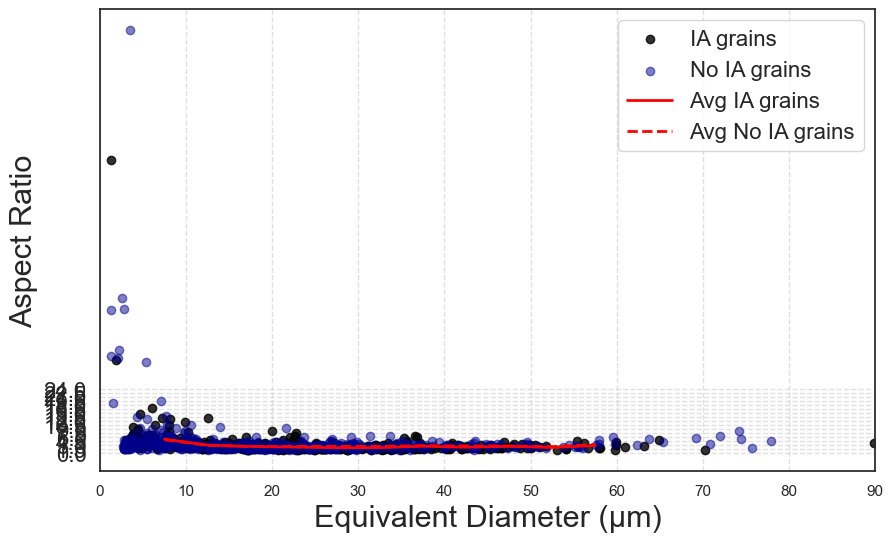

In [314]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


dataBA = aspectratioBA[:,1]
dataNoBA = aspectratioNoBA[:,1]
# sphericity histograms Without threshold


dataBA_inverted = 1/dataBA
dataNoBA_inverted = 1/dataNoBA

eqdiameterBA = np.squeeze(eqdiameterBA)
eqdiameterNoBA = np.squeeze(eqdiameterNoBA)

# Define bin edges (every 5 µm)
bin_edges = np.arange(0, 95, 5)

# Compute binned averages for IA grains (BARD)
df_BARD = pd.DataFrame({'Equivalent Diameter': eqdiameterBA, 'Aspect Ratio': dataBA_inverted})
df_BARD['Diameter Bin'] = pd.cut(df_BARD['Equivalent Diameter'], bins=bin_edges)
avg_BARD = df_BARD.groupby('Diameter Bin').mean()

# Compute binned averages for No IA grains (NoBARD)
df_NoBARD = pd.DataFrame({'Equivalent Diameter': eqdiameterNoBA, 'Aspect Ratio': dataNoBA_inverted})
df_NoBARD['Diameter Bin'] = pd.cut(df_NoBARD['Equivalent Diameter'], bins=bin_edges)
avg_NoBARD = df_NoBARD.groupby('Diameter Bin').mean()


# Extract bin centers for plotting
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Create figure
plt.figure(figsize=(10, 6))

# Scatter plot for IA grains (BARD)
plt.scatter(eqdiameterBA, dataBA_inverted, color='black', alpha=0.8, label='IA grains')

# Scatter plot for No IA grains (NoBARD)
plt.scatter(eqdiameterNoBA, dataNoBA_inverted,color='darkblue',alpha=0.5, label='No IA grains')

# Plot average trend lines
plt.plot(bin_centers[1:12], avg_BARD['Aspect Ratio'][1:12], color='red', linestyle='-', linewidth=2, label='Avg IA grains')
plt.plot(bin_centers[1:12], avg_NoBARD['Aspect Ratio'][1:12], color='red', linestyle='--', linewidth=2, label='Avg No IA grains')

# Set labels and title
plt.xlabel('Equivalent Diameter (µm)', fontsize=22)
plt.ylabel('Aspect Ratio', fontsize=22)

y_ticks = np.arange(0, 25, 1.5)
plt.yticks(y_ticks, fontsize=16)  # Adjust font size as needed
plt.xlim(0, 90)
# Add a legend
plt.legend(fontsize=16)

# Show grid for better visualization
plt.grid(True, linestyle='--', alpha=0.6)

# Save the figure
plt.savefig('aspect_ratio_vs_eqdiameter3DEBSD.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


C:\Users\GlassDesktop\AppData\Local\Temp\ipykernel_25808\2251388520.py:14: RuntimeWarning: divide by zero encountered in divide
  dataBA_inverted = 1 / dataBA
C:\Users\GlassDesktop\AppData\Local\Temp\ipykernel_25808\2251388520.py:15: RuntimeWarning: divide by zero encountered in divide
  dataNoBA_inverted = 1 / dataNoBA
C:\Users\GlassDesktop\AppData\Local\Temp\ipykernel_25808\2251388520.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_BARD = df_BARD.groupby('Diameter Bin').mean()
C:\Users\GlassDesktop\AppData\Local\Temp\ipykernel_25808\2251388520.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  av

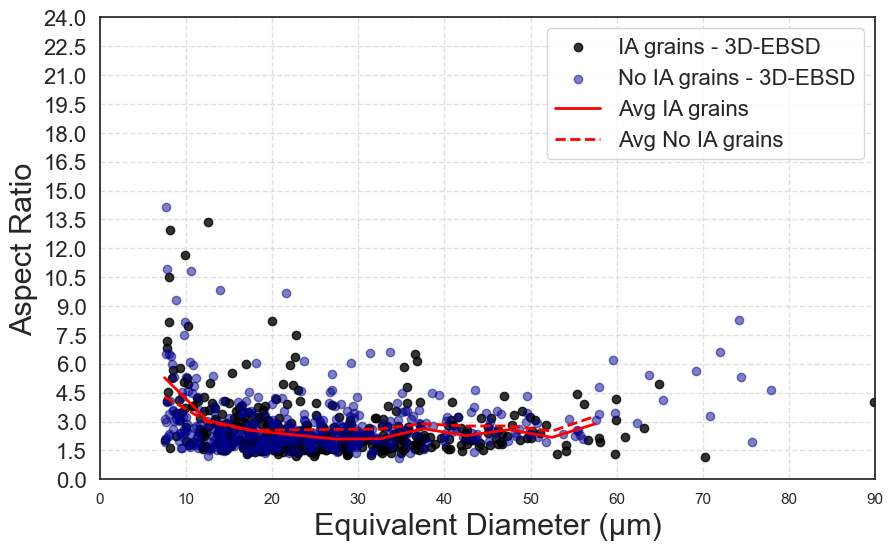

In [315]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set threshold
threshold = 7.5

# Extract data (2D arrays); take second column if needed
dataBA = aspectratioBA[:, 1]
dataNoBA = aspectratioNoBA[:, 1]

# Invert aspect ratio if needed
dataBA_inverted = 1 / dataBA
dataNoBA_inverted = 1 / dataNoBA

# Squeeze diameter arrays
eqdiameterBA = np.squeeze(eqdiameterBA)
eqdiameterNoBA = np.squeeze(eqdiameterNoBA)

# Create boolean masks for thresholding
maskBA = eqdiameterBA > threshold
maskNoBA = eqdiameterNoBA > threshold

# Apply masks to both eqdiameter and aspect ratio data
eqdiameterBA = eqdiameterBA[maskBA]
dataBA_inverted = dataBA_inverted[maskBA]

eqdiameterNoBA = eqdiameterNoBA[maskNoBA]
dataNoBA_inverted = dataNoBA_inverted[maskNoBA]

# Define bin edges (every 5 µm)
bin_edges = np.arange(0, 95, 5)

# Compute binned averages for IA grains (BARD)
df_BARD = pd.DataFrame({
    'Equivalent Diameter': eqdiameterBA,
    'Aspect Ratio': dataBA_inverted
})
df_BARD['Diameter Bin'] = pd.cut(df_BARD['Equivalent Diameter'], bins=bin_edges)
avg_BARD = df_BARD.groupby('Diameter Bin').mean()

# Compute binned averages for No IA grains (NoBARD)
df_NoBARD = pd.DataFrame({
    'Equivalent Diameter': eqdiameterNoBA,
    'Aspect Ratio': dataNoBA_inverted
})
df_NoBARD['Diameter Bin'] = pd.cut(df_NoBARD['Equivalent Diameter'], bins=bin_edges)
avg_NoBARD = df_NoBARD.groupby('Diameter Bin').mean()

# Extract bin centers for plotting
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Create figure
plt.figure(figsize=(10, 6))

# Scatter plots
plt.scatter(eqdiameterBA, dataBA_inverted, color='black', alpha=0.8, label='IA grains - 3D-EBSD')
plt.scatter(eqdiameterNoBA, dataNoBA_inverted, color='darkblue', alpha=0.5, label='No IA grains - 3D-EBSD')

# Plot average trend lines; slicing [1:12] if you only want those bins
plt.plot(bin_centers[1:12], avg_BARD['Aspect Ratio'][1:12],
         color='red', linestyle='-', linewidth=2, label='Avg IA grains')
plt.plot(bin_centers[1:12], avg_NoBARD['Aspect Ratio'][1:12],
         color='red', linestyle='--', linewidth=2, label='Avg No IA grains')

# Labels and appearance
plt.xlabel('Equivalent Diameter (µm)', fontsize=22)
plt.ylabel('Aspect Ratio', fontsize=22)
y_ticks = np.arange(0, 25, 1.5)
plt.yticks(y_ticks, fontsize=16)
plt.xlim(0, 90)
plt.legend(fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)

# Save and show
plt.savefig('aspect_ratio_vs_eqdiameter3DEBSD.png', dpi=300, bbox_inches='tight')
plt.show()
